# Atividade Prática - Parte 1
### Grupo 2:<br>
Arthur Horta <br>
João Henrique <br>
Pedro Fioravante <br>
Victor Monteiro <br>


### Tarefa 1: Importe os dados para este notebook e Gere as Estatísticas descritivas da variável dependente e da variável explicativa

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


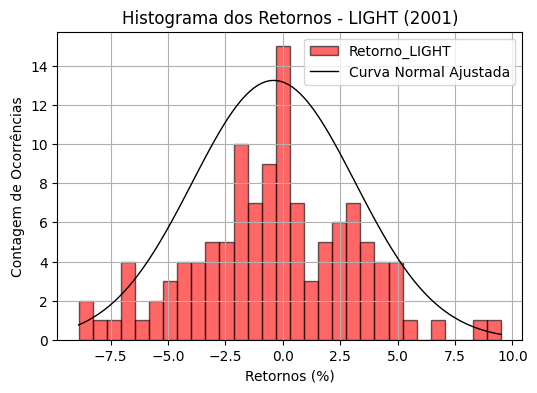

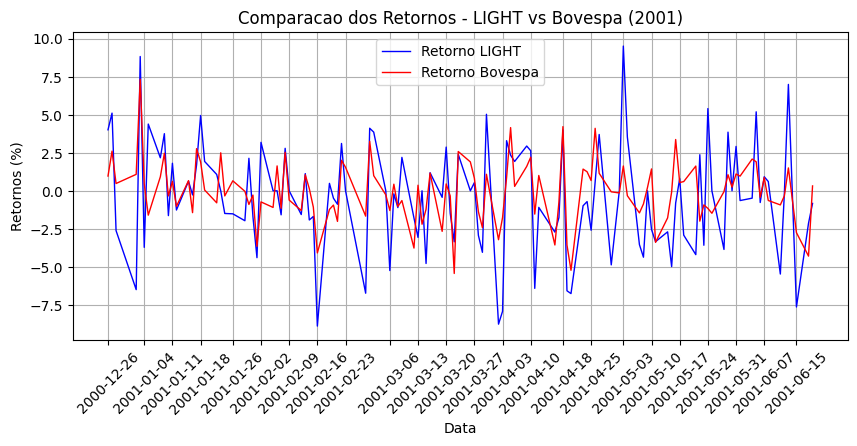

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


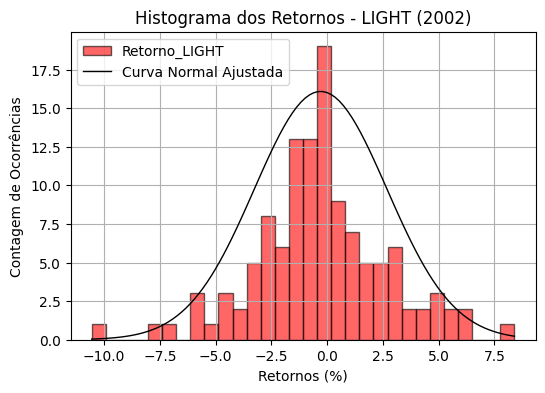

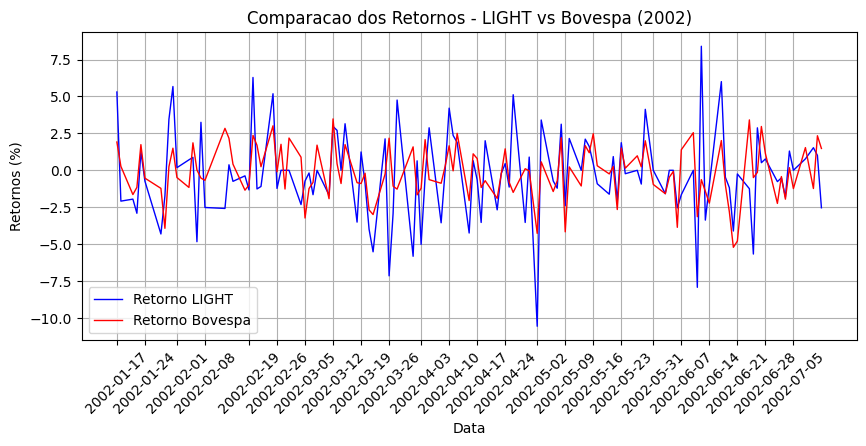

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


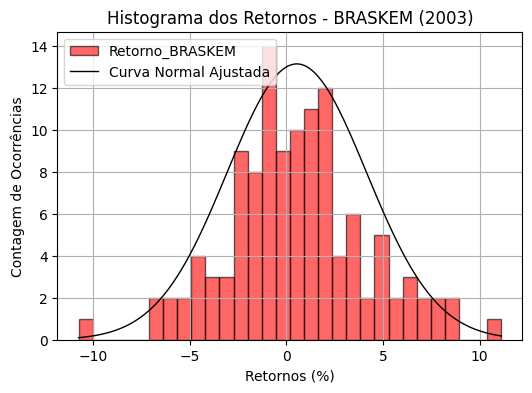

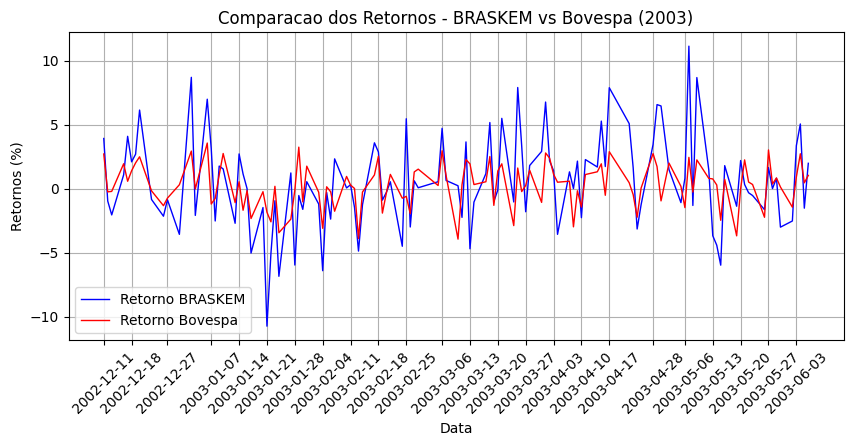

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


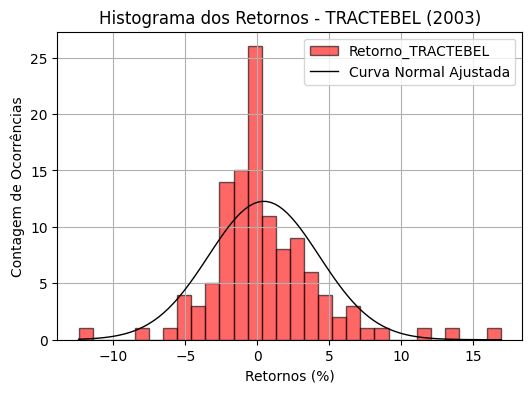

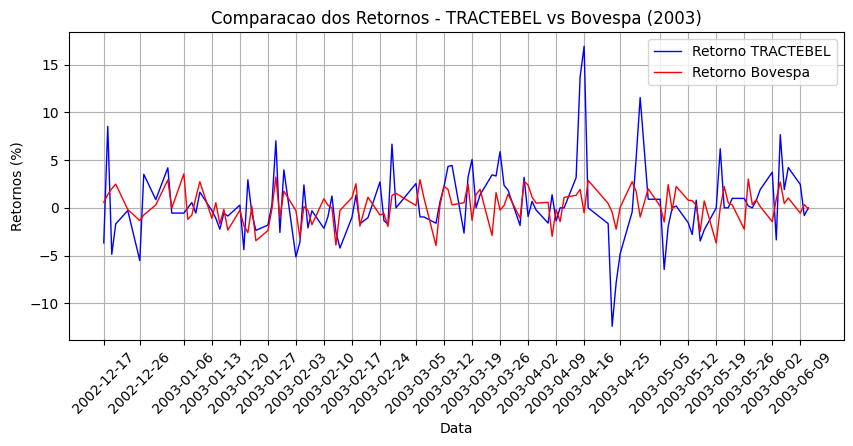

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


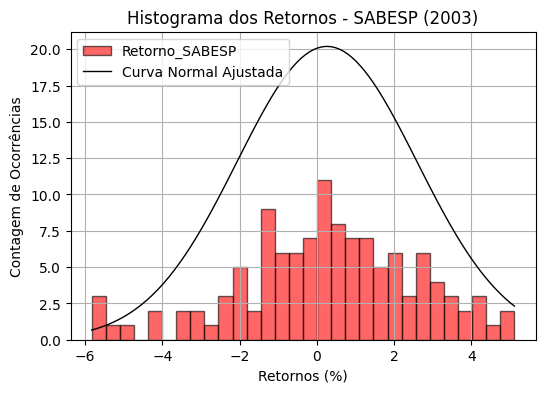

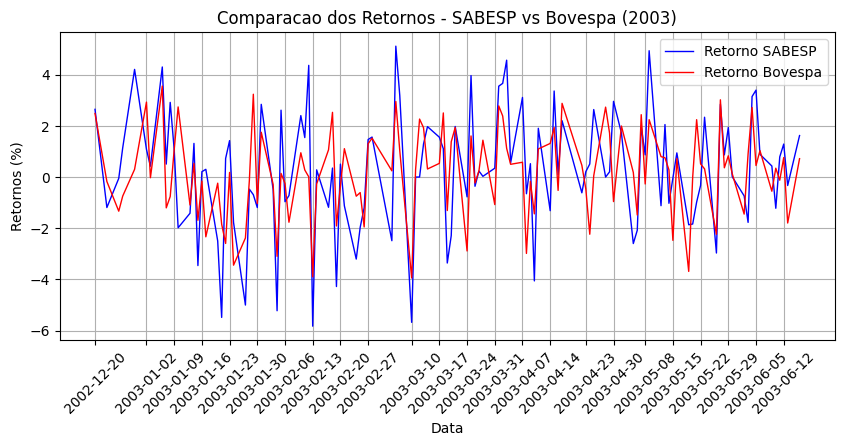

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


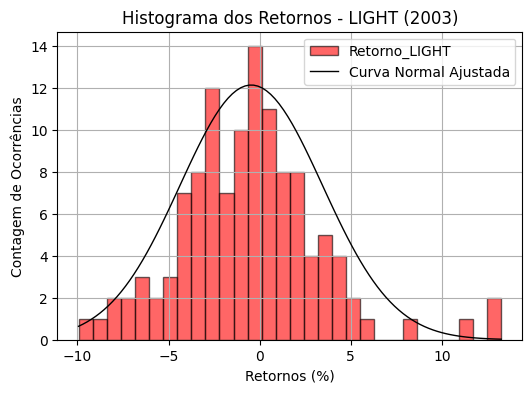

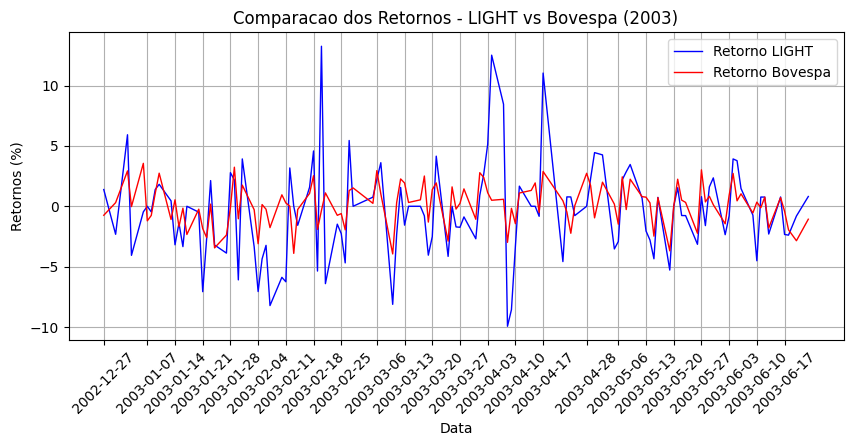

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


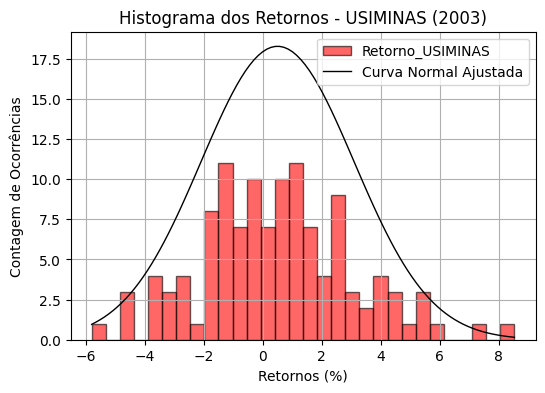

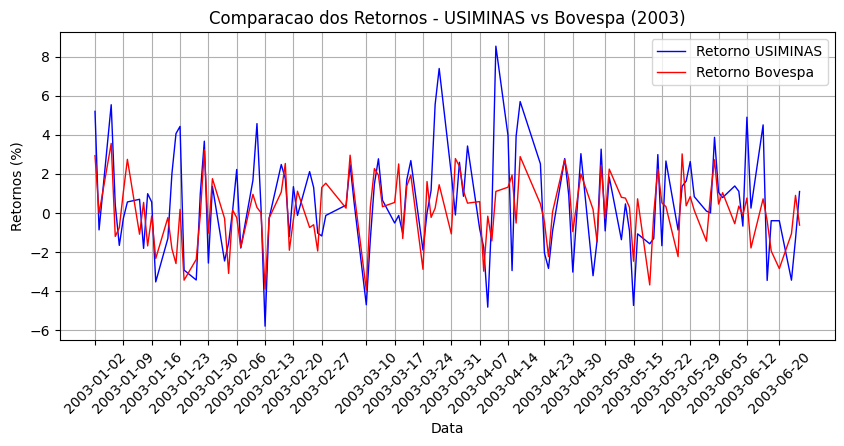

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


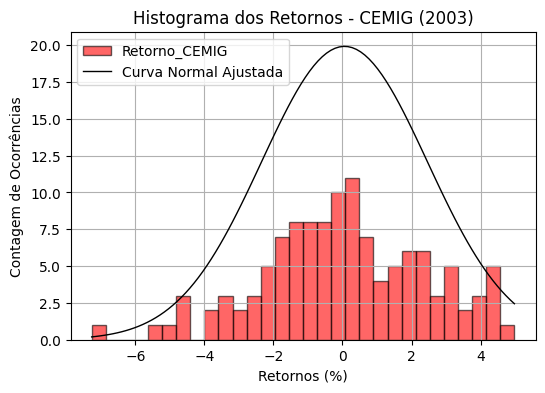

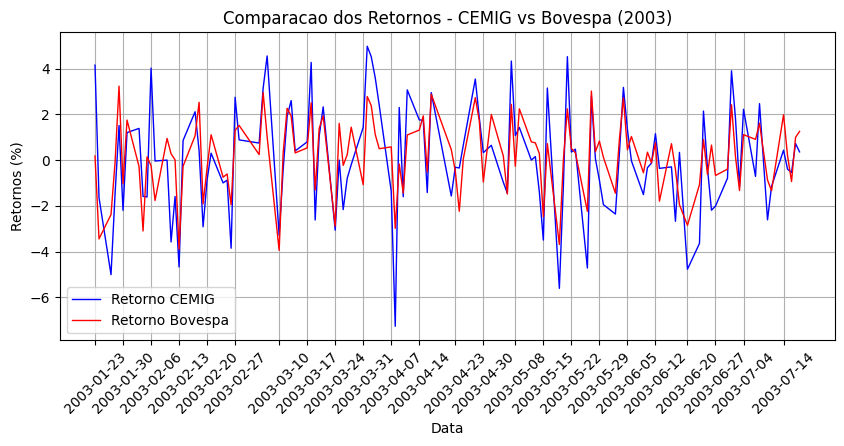

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


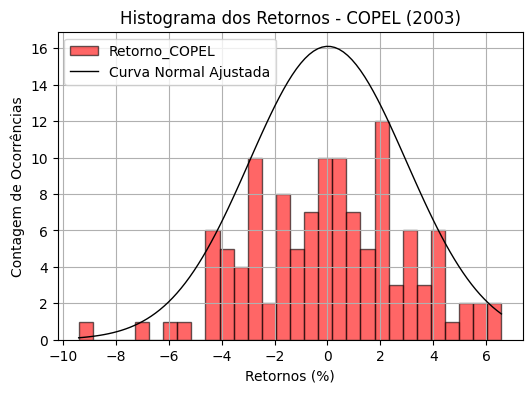

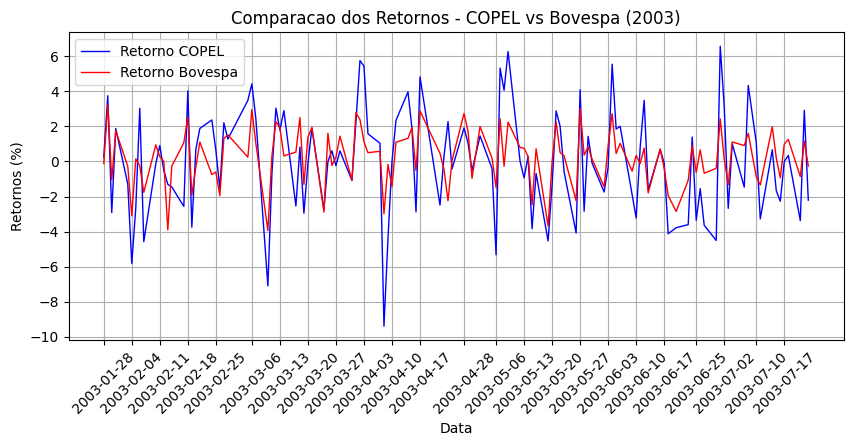

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


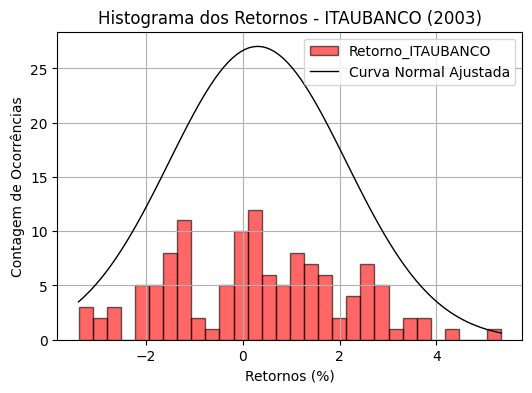

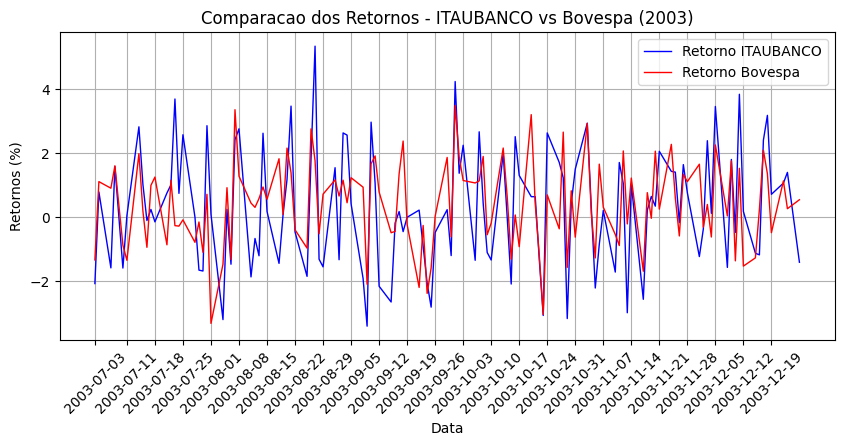

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


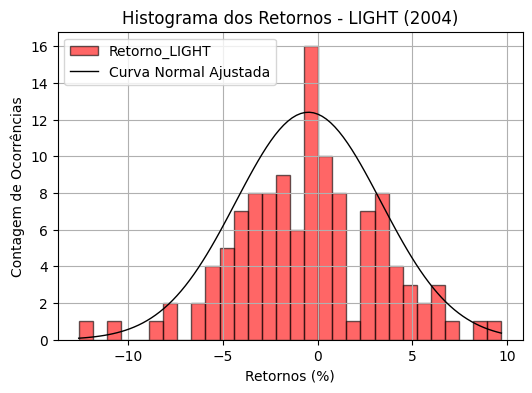

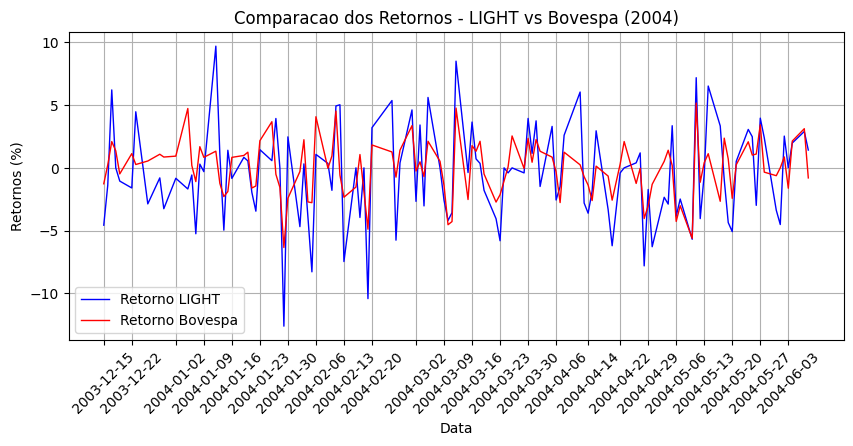

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


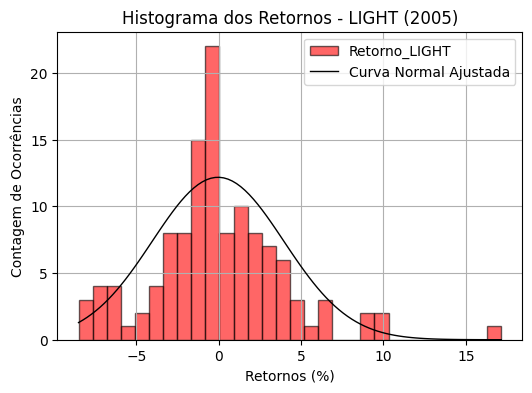

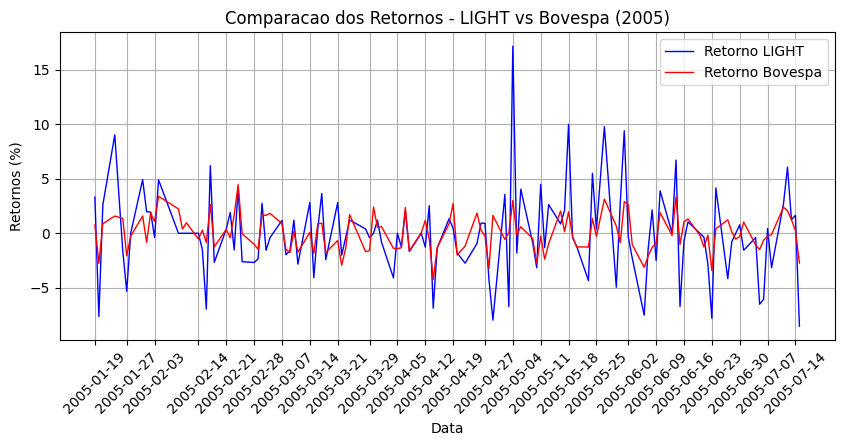


Estatísticas Descritivas para LIGHT (2001)
       Retorno_LIGHT  Retorno_Bovespa
count     118.000000       118.000000
mean       -0.393520        -0.014643
std         3.549642         2.016275
min        -8.896831        -5.437024
25%        -2.613627        -1.156017
50%        -0.235483         0.008904
75%         2.162630         1.100385
max         9.517672         7.335288

Estatísticas Descritivas para LIGHT (2002)
       Retorno_LIGHT  Retorno_Bovespa
count     120.000000       120.000000
mean       -0.290130        -0.147083
std         2.976603         1.826099
min       -10.560798        -5.215002
25%        -1.759533        -1.225643
50%        -0.229125        -0.221469
75%         1.252501         1.483412
max         8.399991         3.479922

Estatísticas Descritivas para BRASKEM (2003)
       Retorno_BRASKEM  Retorno_Bovespa
count       119.000000       119.000000
mean          0.546951         0.250750
std           3.605382         1.709731
min         -10.742108

In [22]:
# Importando bibliotecas
import pandas as pd                         # Para manipulação e análise de dados
import yfinance as yf                       # Para acessar dados financeiros de ações e outros ativos
import numpy as np                          # Para operações matemáticas e manipulação de arrays
import matplotlib.pyplot as plt             # Para visualização de dados e criação de gráficos
from datetime import datetime, timedelta    # Para trabalhar com datas e horários

# Carregando tabela de empresas e datas de divulgação
url = "https://raw.githubusercontent.com/victormontr/Trabalho-Econometria-Grupo-2/refs/heads/main/Empresas.csv"
tabela_empresas = pd.read_csv(url, delimiter=';')

# Mapeamento de tickers do Yahoo Finance para facilitar o download dos dados, cada empresa está associada ao seu ticker
tickers = {
    "LIGHT": "LIGT3.SA",
    "BRASKEM": "BRKM5.SA",
    "TRACTEBEL": "EGIE3.SA",
    "SABESP": "SBSP3.SA",
    "USIMINAS": "USIM5.SA",
    "CEMIG": "CMIG4.SA",
    "COPEL": "CPLE6.SA",
    "ITAUBANCO": "ITUB4.SA"
}

# Função para processar os dados de uma empresa e calcular seus retornos
def processar_empresa(empresa, data_de_divulgacao):

    """
    Processa dados históricos de uma empresa e do índice Bovespa para calcular os retornos.

    Parâmetros:
    empresa (str): Nome da empresa.
    data_de_divulgacao (datetime): Data de divulgação dos resultados.

    Retorna:
    Retornos: DataFrame contendo os retornos da empresa e do Bovespa.
    """

    # Obtendo o ticker correspondente da empresa
    ticker = tickers.get(empresa)

    # Baixando dados da empresa e do Bovespa para o período de 90 dias antes e depois da data de divulgação utilizando o yahoo financie
    start_date, end_date = data_de_divulgacao - timedelta(days=90), data_de_divulgacao + timedelta(days=90)
    empresa_data = yf.download(ticker, start=start_date, end=end_date)['Close']
    bovespa_data = yf.download("^BVSP", start=start_date, end=end_date)['Close']

    # Calculando retornos logarítimos e removendo valores NaN (nulos)
    retornos = pd.DataFrame({
        f'Retorno_{empresa}': np.log(empresa_data / empresa_data.shift(1)) * 100,
        'Retorno_Bovespa': np.log(bovespa_data / bovespa_data.shift(1)) * 100
    }).dropna()

    return retornos

# Função para gerar o histograma com curva normal ajustada
def gerar_histograma(empresa, data_de_divulgacao, retornos):

    """
    Gera um histograma dos retornos da empresa e ajusta uma curva normal para compará-la.

    Parâmetros:
    empresa (str): Nome da empresa.
    data_de_divulgacao (datetime): Data de divulgação dos resultados.
    retornos (DataFrame): Retornos da empresa e do Bovespa.
    """

    # Calculando a média e desvio padrão dos retornos
    media = retornos[f'Retorno_{empresa}'].mean()
    desvio_padrao = retornos[f'Retorno_{empresa}'].std()

    # Gerando histograma dos retornos da empresa com contagem de ocorrências e bordas
    plt.figure(figsize=(6, 4))
    n, bins, patches = plt.hist(retornos[f'Retorno_{empresa}'], bins=30, alpha=0.6, color='r', edgecolor='black', label=f'Retorno_{empresa}')

    # Gerando os valores da curva normal
    x = np.linspace(bins[0], bins[-1], 100)
    curva_normal = len(retornos) * (1 / (desvio_padrao * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - media) / desvio_padrao) ** 2)

    # Plotando a curva normal
    plt.plot(x, curva_normal, 'k', linewidth=1, label='Curva Normal Ajustada')

    # Título e eixos
    plt.title(f"Histograma dos Retornos - {empresa} ({data_de_divulgacao.year})")
    plt.xlabel('Retornos (%)')
    plt.ylabel('Contagem de Ocorrências')

    # Legenda e grade
    plt.legend()
    plt.grid(True)

    # Mostrando o gráfico
    plt.show()

# Função para gerar gráfico de comparação dos retornos da empresa com o Bovespa
def gerar_grafico_retornos(empresa, data_de_divulgacao, retornos):

    """
    Gera um gráfico comparativo dos retornos da empresa e do Bovespa para o período analisado.

    Parâmetros:
    empresa (str): Nome da empresa.
    data_de_divulgacao (datetime): Data de divulgação dos resultados.
    retornos (DataFrame): Retornos da empresa e do Bovespa.
    """
    # Definindo o tamanho do gráfico
    plt.figure(figsize=(10, 4))

    # Plotando os retornos da empresa e do Bovespa
    plt.plot(retornos.index, retornos[f'Retorno_{empresa}'], linewidth=1, label=f'Retorno {empresa}', color='b')
    plt.plot(retornos.index, retornos['Retorno_Bovespa'], linewidth=1, label='Retorno Bovespa', color='r')

    # Formatando o eixo x para evitar sobreposição
    plt.xticks(retornos.index[::5], rotation=45)

    # Título e eixos
    plt.title(f'Comparacao dos Retornos - {empresa} vs Bovespa ({data_de_divulgacao.year})')
    plt.xlabel('Data')
    plt.ylabel('Retornos (%)')

    # Legenda e grade
    plt.legend()
    plt.grid(True)

    # Mostrar o gráfico
    plt.show()

# Processar todas as empresas e coletar estatísticas descritivas
todas_estatisticas = []

# Iterando sobre cada linha da tabela para processar os dados de cada empresa
for _, row in tabela_empresas.iterrows():
    # Obtendo o nome da empresa e a data de divulgação
    empresa = row['Empresas']
    # Convertendo a data de divulgação para um objeto datetime
    data_de_divulgacao = datetime.strptime(row['Data de divulgação'], "%d/%m/%Y")
    # Processando os retornos da empresa e do Bovespa
    retornos = processar_empresa(empresa, data_de_divulgacao)
    # Coletando estatísticas descritivas dos retornos
    estatisticas = retornos.describe()
    todas_estatisticas.append((empresa, data_de_divulgacao.year, estatisticas))

    # Gerar histograma e gráfico de comparação de retornos
    gerar_histograma(empresa, data_de_divulgacao, retornos)
    gerar_grafico_retornos(empresa, data_de_divulgacao, retornos)

# Exibindo estatísticas descritivas para cada empresa
for empresa, ano, estatisticas in todas_estatisticas:
    print(f"\nEstatísticas Descritivas para {empresa} ({ano})")
    print(estatisticas)



## Tarefa 2: Apresente o diagrama de dispersão entre X e Y.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


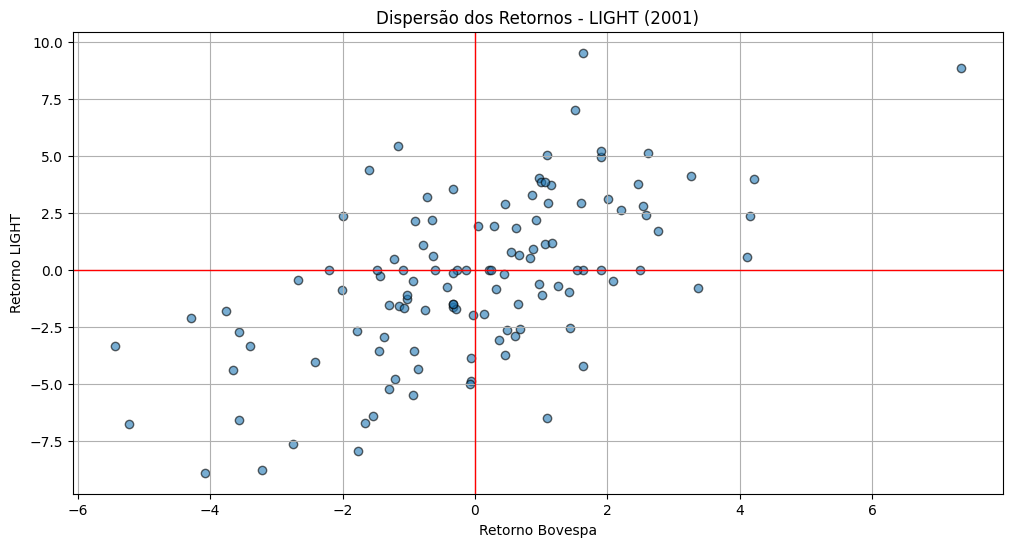

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


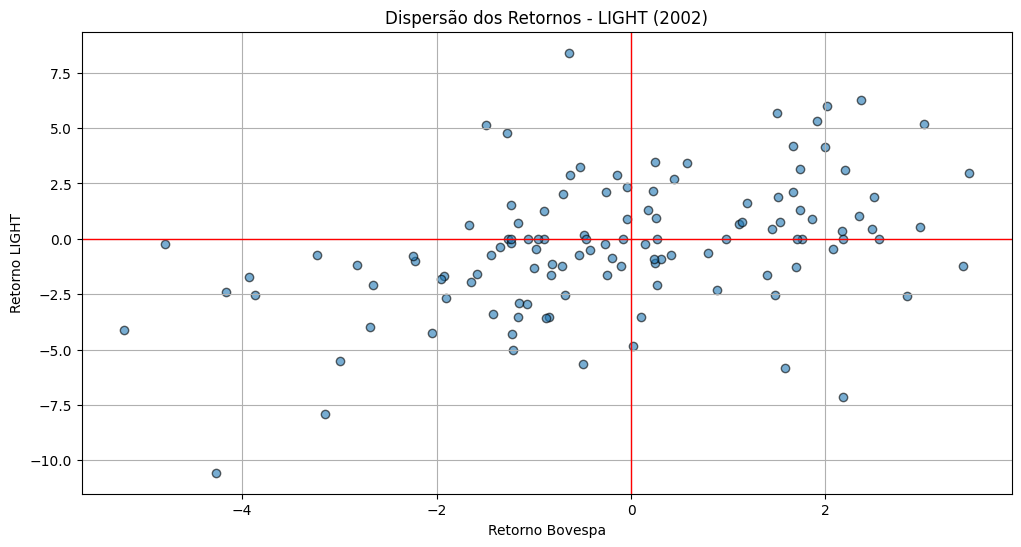

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


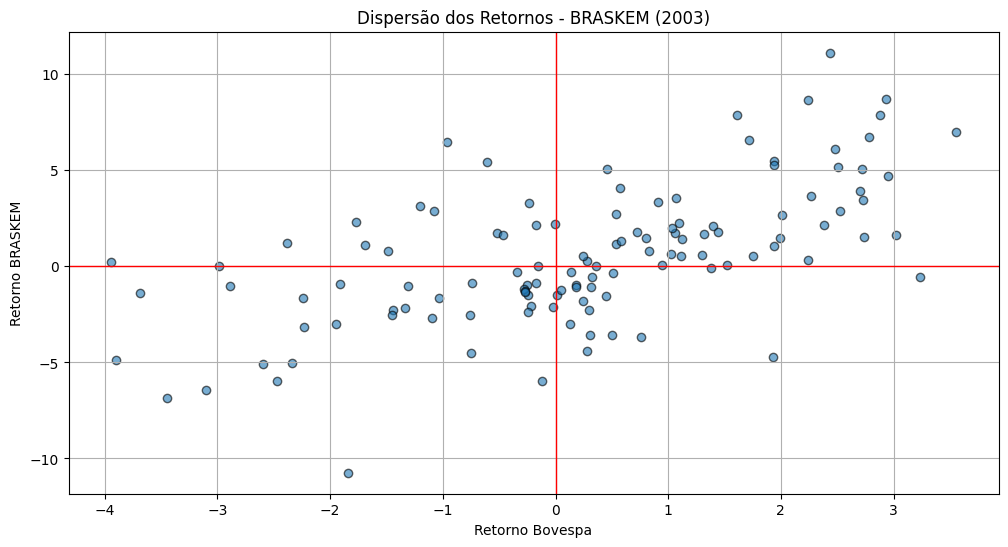

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


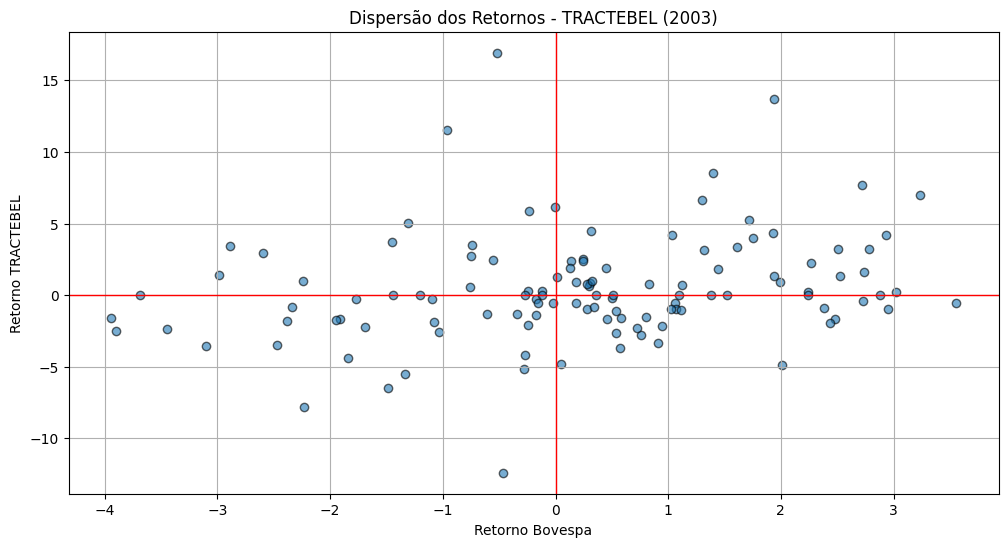

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


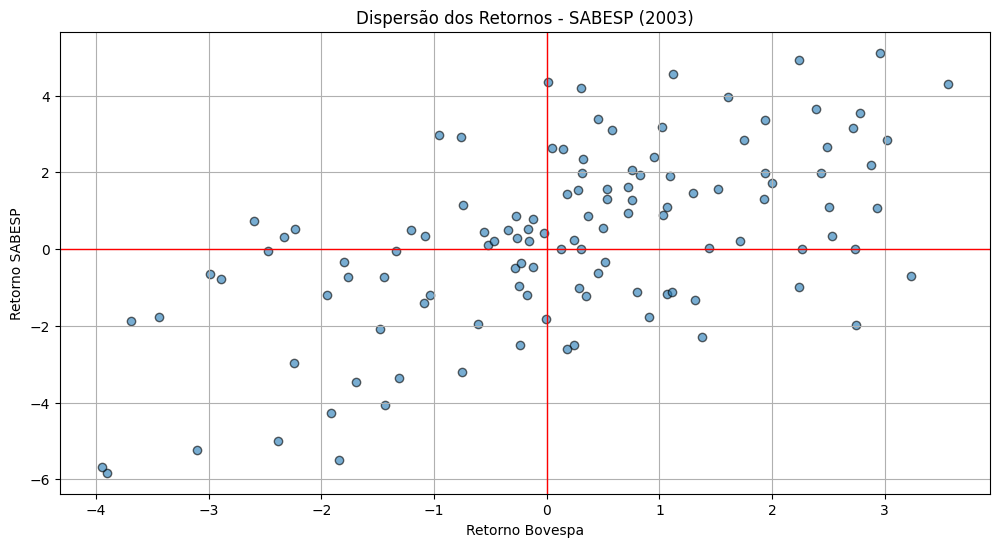

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


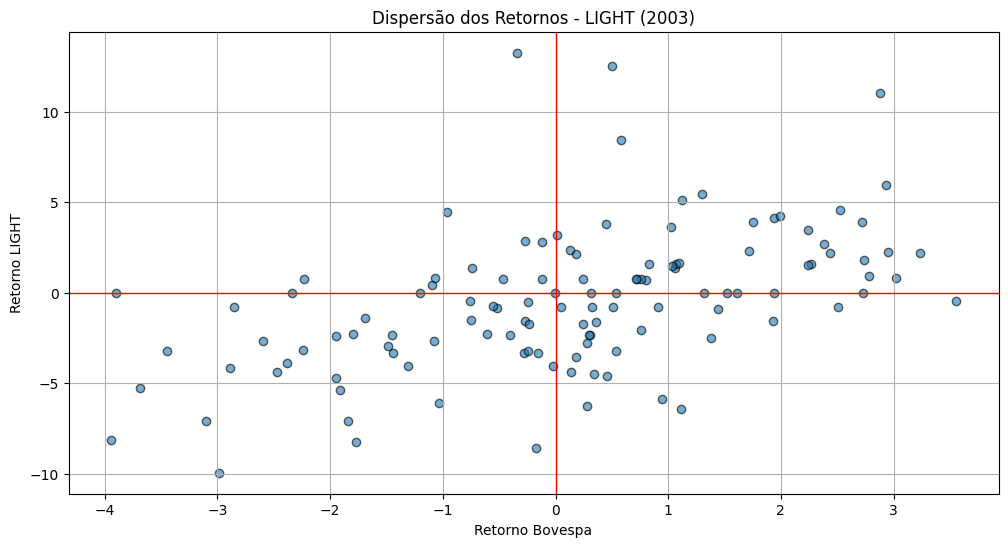

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


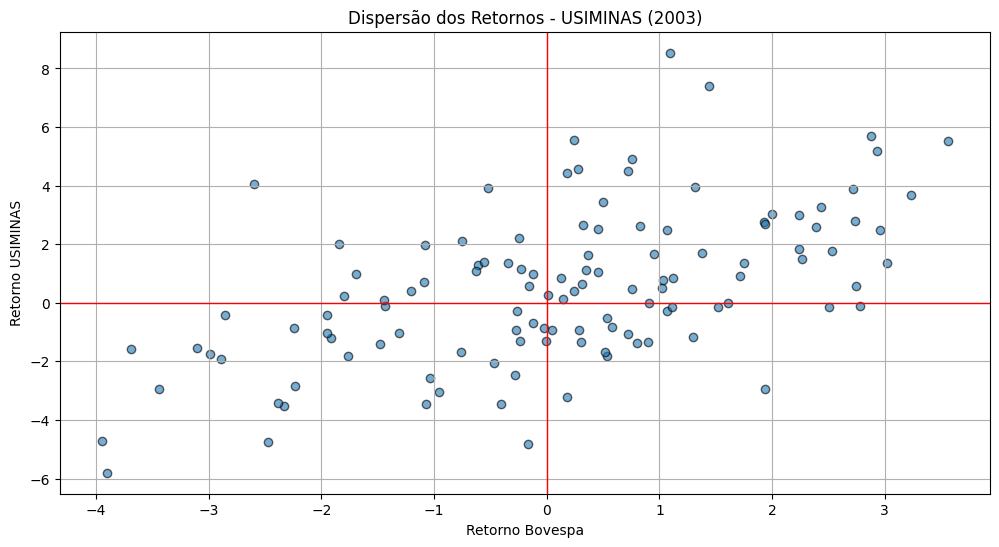

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


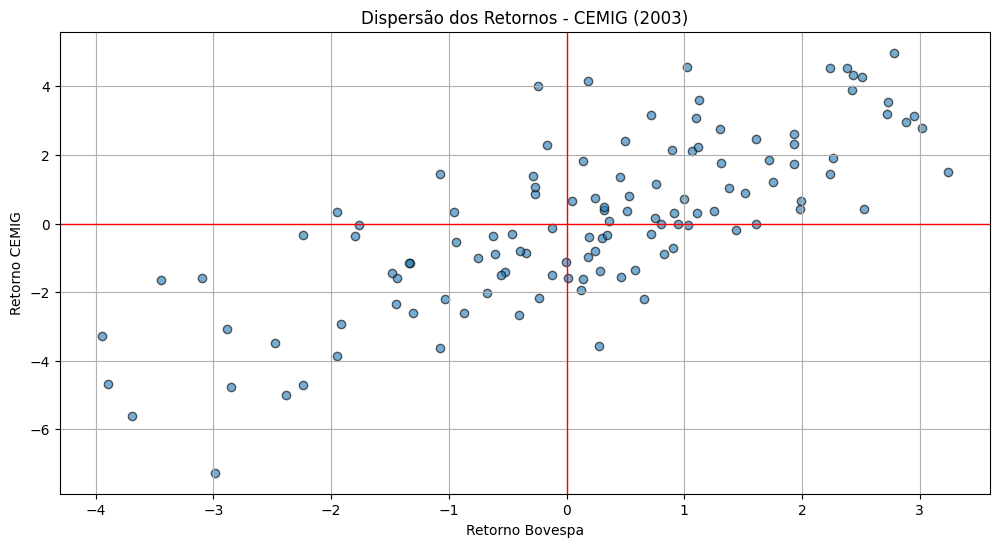

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


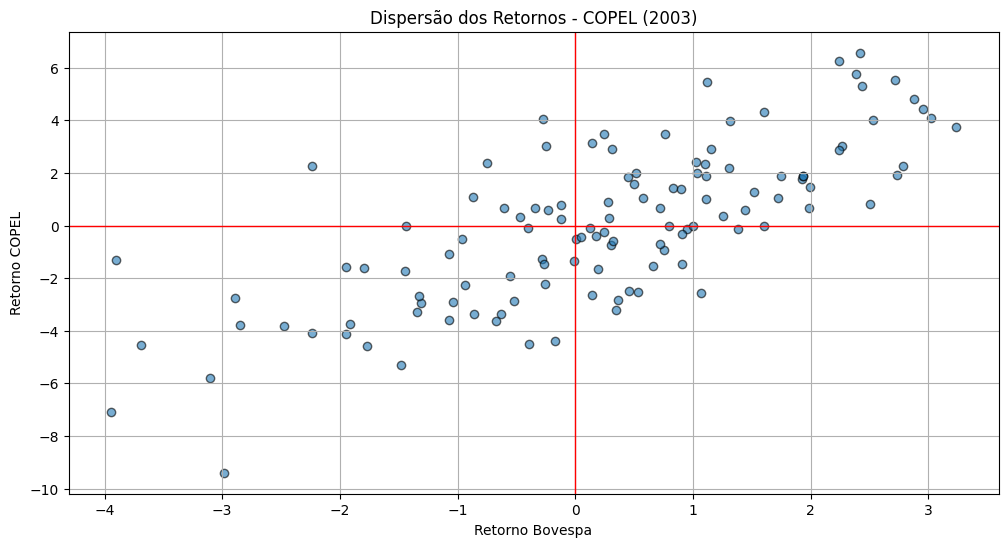

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


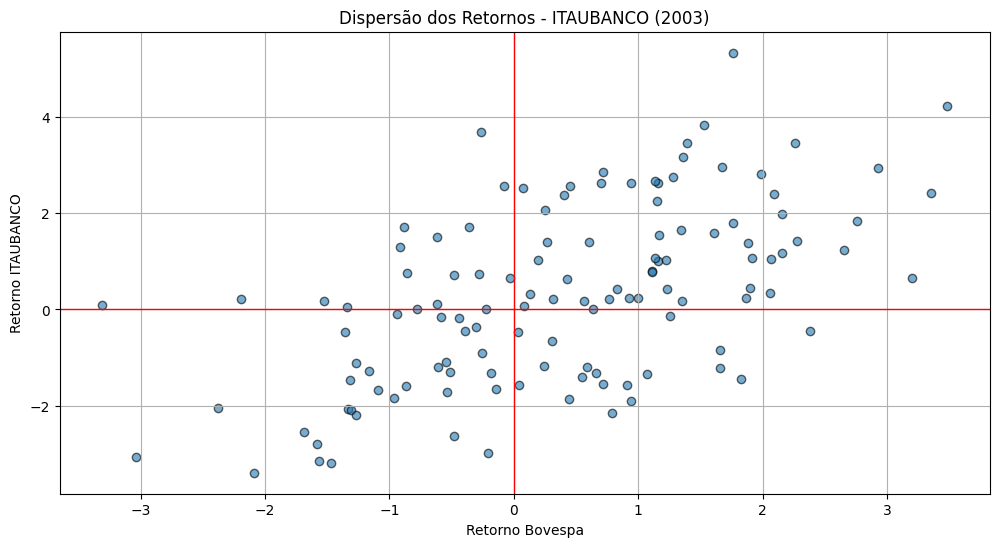

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


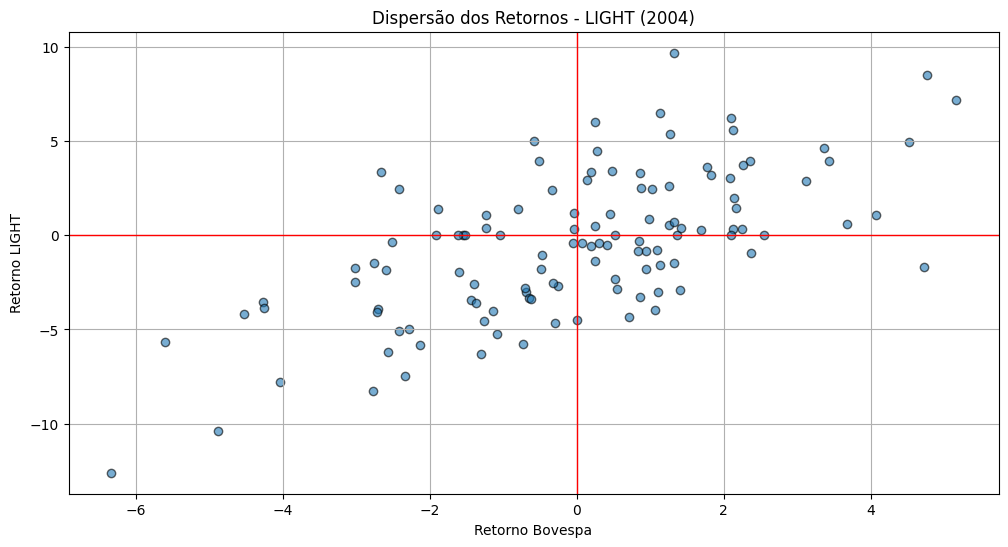

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


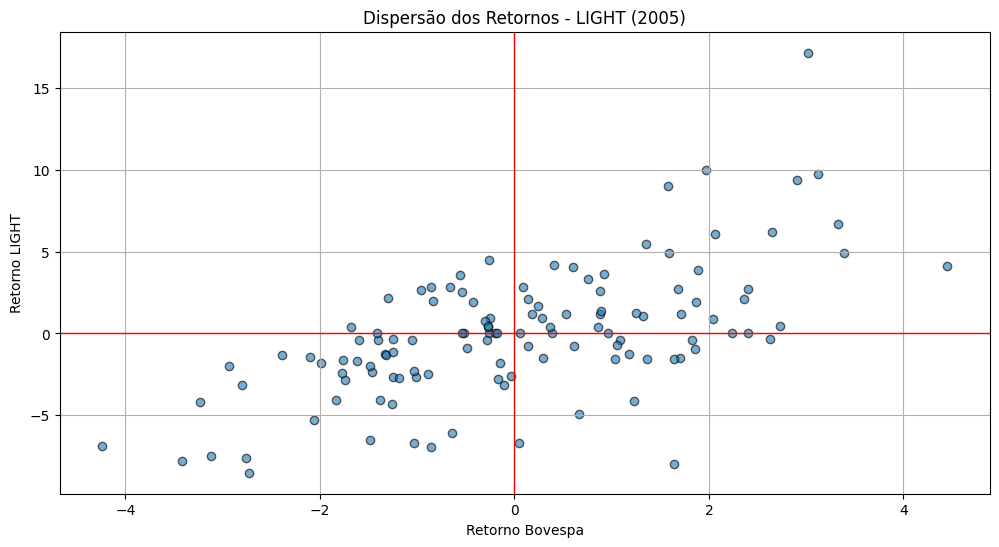

In [25]:
# Função para gerar gráfico de dispersão
def gerar_dispersao(empresa, data_de_divulgacao, retornos):

    """
    Gera um gráfico de dispersão dos retornos da empresa em relação ao índice Bovespa.

    Parâmetros:
    - empresa (str): Nome da empresa.
    - data_de_divulgacao (datetime): Data de divulgação dos resultados da empresa.
    - retornos (DataFrame): DataFrame contendo os retornos do índice Bovespa e da empresa.

    O gráfico de dispersão mostra a relação entre o retorno da empresa e o retorno do índice Bovespa para o período.
    """

    # Configuração do gráfico de dispersão
    plt.figure(figsize=(12, 6))
    plt.scatter(retornos['Retorno_Bovespa'], retornos[f'Retorno_{empresa}'], alpha=0.6, edgecolors='k')
    # Título do gráfico
    plt.title(f'Dispersão dos Retornos - {empresa} ({data_de_divulgacao.year})')
    # Definição dos rótulos dos eixos x e y
    plt.xlabel('Retorno Bovespa')
    plt.ylabel(f'Retorno {empresa}')
    # Exibição da grade para facilitar a visualização dos pontos
    plt.grid(True)
    # Linha horizontal e vertical nos eixos para facilitar visualização
    plt.axhline(0, color='red', linestyle='-', linewidth=1)  # Linha horizontal no eixo y=0
    plt.axvline(0, color='red', linestyle='-', linewidth=1)  # Linha vertical no eixo x=0
    # Exibe o gráfico
    plt.show()

# Loop para criar gráficos de dispersão para cada empresa
for _, row in tabela_empresas.iterrows():
    empresa = row['Empresas']
    data_de_divulgacao = datetime.strptime(row['Data de divulgação'], "%d/%m/%Y")
    retornos = processar_empresa(empresa, data_de_divulgacao)
    # Gerando gráfico de dispersão
    gerar_dispersao(empresa, data_de_divulgacao, retornos)


### Tarefa 3: Estime o modelo linear $y = \alpha + \beta x + u$ e apresente os resultados na saída padrão do _Statsmodels_ no Python

In [26]:
import statsmodels.api as sm

# Função para rodar uma regressão linear
def regressao(retornos, empresa):

    """
    Executa uma regressão linear entre os retornos da empresa e os retornos do Bovespa.

    Parâmetros:
    retornos (DataFrame): DataFrame contendo os retornos do Bovespa e da empresa.
    empresa (str): Nome da empresa para a qual será feita a regressão.

    Retorna:
    modelo : Objeto com os resultados do modelo ajustado.
    """

    # Definindo a variável independente (retornos do Bovespa) e a variável dependente (retornos da empresa)
    X = retornos['Retorno_Bovespa']
    y = retornos[f'Retorno_{empresa}']

    # Adicionando uma constante (intercepto) ao modelo
    X = sm.add_constant(X)

    # Ajustando o modelo de regressão
    modelo = sm.OLS(y, X).fit()

    return modelo

# Rodando a regressão linear para cada empresa
resultados_regressoes = []
for _, row in tabela_empresas.iterrows():
    empresa = row['Empresas']
    data_de_divulgacao = datetime.strptime(row['Data de divulgação'], "%d/%m/%Y")
    retornos = processar_empresa(empresa, data_de_divulgacao)

    # Rodando a regressão
    modelo = regressao(retornos, empresa)
    # Armazenando o resultado da regressão
    resultados_regressoes.append((empresa, data_de_divulgacao.year, modelo))

    # Exibindo o resumo dos resultados
    print(f'\nResumo da Regressão Linear para {empresa} ({data_de_divulgacao.year}):')
    print(modelo.summary())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Resumo da Regressão Linear para LIGHT (2001):
                            OLS Regression Results                            
Dep. Variable:          Retorno_LIGHT   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     64.80
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           8.07e-13
Time:                        22:33:48   Log-Likelihood:                -290.24
No. Observations:                 118   AIC:                             584.5
Df Residuals:                     116   BIC:                             590.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Resumo da Regressão Linear para TRACTEBEL (2003):
                            OLS Regression Results                            
Dep. Variable:      Retorno_TRACTEBEL   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     7.071
Date:                Thu, 10 Oct 2024   Prob (F-statistic):            0.00894
Time:                        22:33:48   Log-Likelihood:                -322.12
No. Observations:                 118   AIC:                             648.2
Df Residuals:                     116   BIC:                             653.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                            OLS Regression Results                            
Dep. Variable:       Retorno_USIMINAS   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     50.68
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           9.44e-11
Time:                        22:33:48   Log-Likelihood:                -260.46
No. Observations:                 119   AIC:                             524.9
Df Residuals:                     117   BIC:                             530.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4021      0.200     

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Resumo da Regressão Linear para LIGHT (2004):
                            OLS Regression Results                            
Dep. Variable:          Retorno_LIGHT   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     82.37
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           3.26e-15
Time:                        22:33:49   Log-Likelihood:                -296.32
No. Observations:                 119   AIC:                             596.6
Df Residuals:                     117   BIC:                             602.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------